<a href="https://colab.research.google.com/github/alebos-source/solid-octo-barnacle/blob/pro/Ex01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

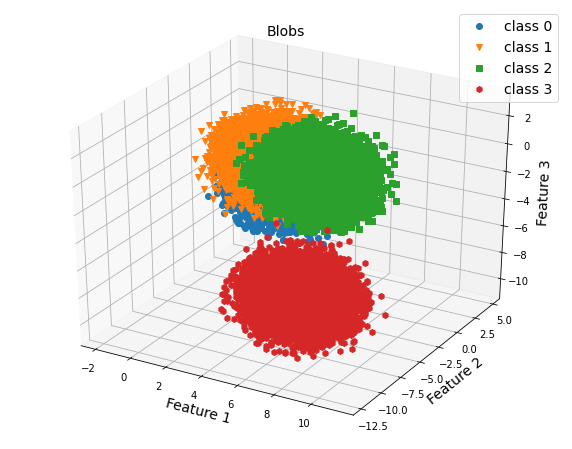

In [32]:
#standard imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#function for fast generation of training and test set from data
from sklearn.model_selection import train_test_split
#generators of very simple datasets
from sklearn.datasets import make_blobs, make_moons
#logistic regression model
from sklearn.linear_model import LogisticRegression


#fix parameters
N = 200000 #number of observations
D = 3 # features per sample
test_size = .25 #test data are 25%

#random numbers genereator initial state
rnd_state = 52561
np.random.seed(rnd_state)

#generate two blobs, one for each class, of 3D data (4 classes)
X_blob, y_blob = make_blobs(n_samples=N, n_features=D, centers=4)

#generate training and test set
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=test_size)

#plot the blob dataset
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
fontsize = 14

#plot the points of the first class:
mask = y_blob_train == 0
#plot first feature on x-axis, second feature on y-axis, third on z
ax.plot(X_blob_train[mask][:,0], X_blob_train[mask][:,1], X_blob_train[mask][:,2],'o', label='class 0') 

#plot the points of the second class:
mask = y_blob_train == 1
#plot first feature on x-axis, second feature on y-axis, third on z
ax.plot(X_blob_train[mask][:,0], X_blob_train[mask][:,1], X_blob_train[mask][:,2], 'v', label='class 1')

#plot the points of the third class:
mask = y_blob_train == 2
#plot first feature on x-axis, second feature on y-axis, third on z
ax.plot(X_blob_train[mask][:,0], X_blob_train[mask][:,1], X_blob_train[mask][:,2], 's', label='class 2')

#plot the points of the fourth class:
mask = y_blob_train == 3
#plot first feature on x-axis, second feature on y-axis, third on z
ax.plot(X_blob_train[mask][:,0], X_blob_train[mask][:,1], X_blob_train[mask][:,2], 'h', label='class 3')

ax.legend(fontsize=fontsize)
ax.set_xlabel('Feature 1', fontsize=fontsize)
ax.set_ylabel('Feature 2', fontsize=fontsize)
ax.set_zlabel('Feature 3', fontsize=fontsize)
ax.set_title('Blobs', fontsize=fontsize);

In [33]:
#preprocessing
from sklearn import preprocessing
#standardization
train_scaler = preprocessing.StandardScaler().fit(X_blob_train)
test_scaler = preprocessing.StandardScaler().fit(X_blob_test)

#standardized data
X_blob_train_scaled = train_scaler.transform(X_blob_train)
X_blob_test_scaled = test_scaler.transform(X_blob_test)

#training
clf = LogisticRegression(random_state=10).fit(X_blob_train_scaled, y_blob_train)

#test
y_blob_prediction = clf.predict(X_blob_test_scaled)

clf_probs = clf.predict_proba(X_blob_test_scaled)

clf_score = clf.score(X_blob_test_scaled, y_blob_test)
 

print(y_blob_prediction)
print(clf_probs)
print(clf_score)
clf.get_params()

[0 3 3 ... 2 0 1]
[[9.05292250e-01 3.14407290e-02 6.32670027e-02 1.84880435e-08]
 [8.65706797e-18 3.53731707e-07 7.36623940e-07 9.99998910e-01]
 [2.43577050e-13 5.85873137e-10 5.46347325e-07 9.99999453e-01]
 ...
 [3.55654752e-06 6.08644233e-03 9.93695064e-01 2.14937360e-04]
 [9.99996862e-01 1.28065949e-06 1.85730110e-06 1.55897051e-12]
 [3.20250388e-08 9.86948425e-01 1.30515427e-02 2.63664914e-11]]
0.93756


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 10,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}